In this post I go over how you can extract some extra information from the play by play movement animations on stats.nba.com.

In [1]:
import requests
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import IFrame

In [2]:
sns.set_color_codes()
sns.set_style("white")

The play we will be extracting information from is [this one](http://stats.nba.com/cvp.html?GameID=0041400235&GameEventID=308) from game 5 of the Clippers-Rockets playoff series.  In the play James Harden drives to the basket, collapsing the Clippers defense, and then passes to Trevor Ariza for an easy 3.

I've embedded the movement animation below.

In [3]:
IFrame('http://stats.nba.com/movement/#!/?GameID=0041400235&GameEventID=308',
              width=700, height=400)

###Getting the Data

The [url](http://stats.nba.com/stats/locations_getmoments/?eventid=308&gameid=0041400235) below connects us to the data we want from the stats.nba.com API.  There are two parameters within the url.  The **eventid** is the ID number for this specific play.  The **gameid** is the ID for this playoff game.

In [4]:
url = "http://stats.nba.com/stats/locations_getmoments/?eventid=308&gameid=0041400235"

Lets extract our data using `requests`

In [5]:
# Get the webpage
response = requests.get(url)
# Take a look at the keys from the dict
# representing the JSON data
response.json().keys()

dict_keys(['visitor', 'gamedate', 'moments', 'gameid', 'home'])

The data we want is found within *home* (home players' data), *visitors* (visitor players' data), and *moments* (the data that contains the information used by the animation above to plot the player movements).

In [6]:
# A dict containing home players data
home = response.json()["home"]
# A dict containig visiting players data
visitor = response.json()["visitor"]
# A list containing each moment
moments = response.json()["moments"]

Lets take a look at what information the *home* dict contains.

In [7]:
home

{'abbreviation': 'HOU',
 'name': 'Houston Rockets',
 'players': [{'firstname': 'Trevor',
   'jersey': '1',
   'lastname': 'Ariza',
   'playerid': 2772,
   'position': 'F'},
  {'firstname': 'Nick',
   'jersey': '3',
   'lastname': 'Johnson',
   'playerid': 203910,
   'position': 'G'},
  {'firstname': 'Josh',
   'jersey': '5',
   'lastname': 'Smith',
   'playerid': 2746,
   'position': 'F'},
  {'firstname': 'Terrence',
   'jersey': '6',
   'lastname': 'Jones',
   'playerid': 203093,
   'position': 'F'},
  {'firstname': 'Joey',
   'jersey': '8',
   'lastname': 'Dorsey',
   'playerid': 201595,
   'position': 'C-F'},
  {'firstname': 'Pablo',
   'jersey': '9',
   'lastname': 'Prigioni',
   'playerid': 203143,
   'position': 'G'},
  {'firstname': 'Dwight',
   'jersey': '12',
   'lastname': 'Howard',
   'playerid': 2730,
   'position': 'C'},
  {'firstname': 'James',
   'jersey': '13',
   'lastname': 'Harden',
   'playerid': 201935,
   'position': 'G'},
  {'firstname': 'Clint',
   'jersey': '15

The *visitor* dict contains the same type of information, but it's info regarding the Clippers. 

In [8]:
visitor

{'abbreviation': 'LAC',
 'name': 'Los Angeles Clippers',
 'players': [{'firstname': 'Glen',
   'jersey': '0',
   'lastname': 'Davis',
   'playerid': 201175,
   'position': 'F-C'},
  {'firstname': 'Chris',
   'jersey': '3',
   'lastname': 'Paul',
   'playerid': 101108,
   'position': 'G'},
  {'firstname': 'JJ',
   'jersey': '4',
   'lastname': 'Redick',
   'playerid': 200755,
   'position': 'G'},
  {'firstname': 'DeAndre',
   'jersey': '6',
   'lastname': 'Jordan',
   'playerid': 201599,
   'position': 'C'},
  {'firstname': 'Spencer',
   'jersey': '10',
   'lastname': 'Hawes',
   'playerid': 201150,
   'position': 'F-C'},
  {'firstname': 'Jamal',
   'jersey': '11',
   'lastname': 'Crawford',
   'playerid': 2037,
   'position': 'G'},
  {'firstname': 'Ekpe',
   'jersey': '13',
   'lastname': 'Udoh',
   'playerid': 202327,
   'position': 'F'},
  {'firstname': 'Lester',
   'jersey': '14',
   'lastname': 'Hudson',
   'playerid': 201991,
   'position': 'G'},
  {'firstname': 'Hedo',
   'jersey

Now lets take a look at the *moments* list.

In [9]:
# Check the length
len(moments)

700

The length tells us that there are 700 items/moments that compose the animation above.  But what information do these moments contain?  Let's take a look at the first one.

In [10]:
moments[0]

[3,
 1431486313010,
 715.32,
 19.0,
 None,
 [[-1, -1, 43.51745, 10.76997, 1.11823],
  [1610612745, 1891, 43.21625, 12.9461, 0.0],
  [1610612745, 2772, 90.84496, 7.79534, 0.0],
  [1610612745, 2730, 77.19964, 34.36718, 0.0],
  [1610612745, 2746, 46.24382, 21.14748, 0.0],
  [1610612745, 201935, 81.0992, 48.10742, 0.0],
  [1610612746, 2440, 88.12605, 11.23036, 0.0],
  [1610612746, 200755, 84.41011, 43.47075, 0.0],
  [1610612746, 101108, 46.18569, 16.49072, 0.0],
  [1610612746, 201599, 78.64683, 31.87798, 0.0],
  [1610612746, 201933, 65.89714, 25.57281, 0.0]]]

First off, we see that the moment or item in *moments* is a list that contains a bunch of information.  Lets go through each of the items in the list one by one.
1. The 1st item in moments[0] is the period or quarter that this moment occurred in.
2. I don't know what the 2nd item represents.  Let me know if you are able to figure it out.
3. The 3rd item is the time left in the game clock.
4. The 4th item is the time left on th shot clock.
5. I don't know what the 5th item represents.
6. The 6th item is a list of 11 lists, each containing the coordinates for a player on the court or the coordinates of the ball.
 1. The first of these 11 lists contains information on the ball.  
    1. The first 2 items represnt the **teamid** and **playerid** values that identify this list as the ball.
    2. The next 2 items are the x and y values that represent the location of the ball on the court.
    3. And the 5th and final item represents the radius of the ball. This value changes throughout the animation depending on the elevation of the ball.  The greater the radius, the higher up the ball is.  So if a player shoots the ball, the ball will increase in size, reach its maximum size at the apex of the shooting arch and then decrease in size as it falls down.
  2. The next 10 lists within this 6th item represent the 10 players on the court. The information within each of these lists is the same as it is for the ball.
    1. The first 2 items are the **teamid** and **playerid** that identify this list as a specific player.
    2. The next 2 items represent the x and y coordinates for the player's location on the court.
    3. And the last item is the radius of the player, which is irrelevant.
    
Now that we have an idea of what the *moments* data represents, lets put it into a `pandas DataFrame`.

First we create the column labels for the `DataFrame`.

In [11]:
# Column labels
headers = ["team_id", "player_id", "x_loc", "y_loc", 
           "radius", "moment", "game_clock", "shot_clock"]

Then we create a seperate list containing the *moments* data for each player.

In [12]:
# Initialize our new list
player_moments = []

for moment in moments:
    # For each player/ball in the list found within each moment
    for player in moment[5]:
        # Add additional information to each player/ball
        # This info includes the index of each moment, the game clock
        # and shot clock values for each moment
        player.extend((moments.index(moment), moment[2], moment[3]))
        player_moments.append(player)

In [13]:
# inspect our list
player_moments[0:11]

[[-1, -1, 43.51745, 10.76997, 1.11823, 0, 715.32, 19.0],
 [1610612745, 1891, 43.21625, 12.9461, 0.0, 0, 715.32, 19.0],
 [1610612745, 2772, 90.84496, 7.79534, 0.0, 0, 715.32, 19.0],
 [1610612745, 2730, 77.19964, 34.36718, 0.0, 0, 715.32, 19.0],
 [1610612745, 2746, 46.24382, 21.14748, 0.0, 0, 715.32, 19.0],
 [1610612745, 201935, 81.0992, 48.10742, 0.0, 0, 715.32, 19.0],
 [1610612746, 2440, 88.12605, 11.23036, 0.0, 0, 715.32, 19.0],
 [1610612746, 200755, 84.41011, 43.47075, 0.0, 0, 715.32, 19.0],
 [1610612746, 101108, 46.18569, 16.49072, 0.0, 0, 715.32, 19.0],
 [1610612746, 201599, 78.64683, 31.87798, 0.0, 0, 715.32, 19.0],
 [1610612746, 201933, 65.89714, 25.57281, 0.0, 0, 715.32, 19.0]]

Pass in our newly created list of moments into `pd.DataFrame` along with our column labels, to create our `DataFrame`.

In [14]:
df = pd.DataFrame(player_moments, columns=headers)

In [15]:
df.head(11)

team_id  player_id     x_loc     y_loc   radius  moment  game_clock  \
0           -1         -1  43.51745  10.76997  1.11823       0      715.32   
1   1610612745       1891  43.21625  12.94610  0.00000       0      715.32   
2   1610612745       2772  90.84496   7.79534  0.00000       0      715.32   
3   1610612745       2730  77.19964  34.36718  0.00000       0      715.32   
4   1610612745       2746  46.24382  21.14748  0.00000       0      715.32   
5   1610612745     201935  81.09920  48.10742  0.00000       0      715.32   
6   1610612746       2440  88.12605  11.23036  0.00000       0      715.32   
7   1610612746     200755  84.41011  43.47075  0.00000       0      715.32   
8   1610612746     101108  46.18569  16.49072  0.00000       0      715.32   
9   1610612746     201599  78.64683  31.87798  0.00000       0      715.32   
10  1610612746     201933  65.89714  25.57281  0.00000       0      715.32   

    shot_clock  
0           19  
1           19  
2           19  
3           19  
4           19  
5           19  
6           19  
7           19  
8           19  
9           19  
10          19

We are not done yet.  We should add columns that contain player names and jersey numbers. First lets get all the players into one list.

In [16]:
# creates the players list with the home players
players = home["players"]
# Then add on the visiting players
players.extend(visitor["players"])

Using the *players* list we can create a dictionary with the player ID as the key and a list containing the player name and jersey number as the value.

In [17]:
# initialize new dictionary
id_dict = {}

# Add the values we want
for player in players:
    id_dict[player['playerid']] = [player["firstname"]+" "+player["lastname"],
                                   player["jersey"]]

In [18]:
id_dict

{1891: ['Jason Terry', '31'],
 2037: ['Jamal Crawford', '11'],
 2045: ['Hedo Turkoglu', '15'],
 2440: ['Matt Barnes', '22'],
 2563: ['Dahntay Jones', '31'],
 2730: ['Dwight Howard', '12'],
 2746: ['Josh Smith', '5'],
 2772: ['Trevor Ariza', '1'],
 101108: ['Chris Paul', '3'],
 200755: ['JJ Redick', '4'],
 201147: ['Corey Brewer', '33'],
 201150: ['Spencer Hawes', '10'],
 201175: ['Glen Davis', '0'],
 201595: ['Joey Dorsey', '8'],
 201599: ['DeAndre Jordan', '6'],
 201933: ['Blake Griffin', '32'],
 201935: ['James Harden', '13'],
 201991: ['Lester Hudson', '14'],
 202327: ['Ekpe Udoh', '13'],
 203085: ['Austin Rivers', '25'],
 203093: ['Terrence Jones', '6'],
 203123: ['Kostas Papanikolaou', '16'],
 203143: ['Pablo Prigioni', '9'],
 203909: ['KJ McDaniels', '32'],
 203910: ['Nick Johnson', '3'],
 203991: ['Clint Capela', '15']}

Lets update *id_dict* to include an id for the ball

In [19]:
id_dict.update({-1: ['ball', np.nan]})

Then create a *player_name* column and *player_jersey* column using the `map` method on the *player_id* column.  We will map an anonymous function, using `lambda`, that returns the proper *player_name* and *player_jersey* based on the *player_id* value passed into the function.  

In other words, what the code below does is iterate through the player IDs in the *player_id* column, and then passes each player ID into the anonymous function. This function then returns the player name and jersey associated with that player ID and adds those values to our `DataFrame`.

In [20]:
df["player_name"] = df.player_id.map(lambda x: id_dict[x][0])
df["player_jersey"] = df.player_id.map(lambda x: id_dict[x][1])

In [21]:
df.head(11)

team_id  player_id     x_loc     y_loc   radius  moment  game_clock  \
0           -1         -1  43.51745  10.76997  1.11823       0      715.32   
1   1610612745       1891  43.21625  12.94610  0.00000       0      715.32   
2   1610612745       2772  90.84496   7.79534  0.00000       0      715.32   
3   1610612745       2730  77.19964  34.36718  0.00000       0      715.32   
4   1610612745       2746  46.24382  21.14748  0.00000       0      715.32   
5   1610612745     201935  81.09920  48.10742  0.00000       0      715.32   
6   1610612746       2440  88.12605  11.23036  0.00000       0      715.32   
7   1610612746     200755  84.41011  43.47075  0.00000       0      715.32   
8   1610612746     101108  46.18569  16.49072  0.00000       0      715.32   
9   1610612746     201599  78.64683  31.87798  0.00000       0      715.32   
10  1610612746     201933  65.89714  25.57281  0.00000       0      715.32   

    shot_clock     player_name player_jersey  
0           19            ball           NaN  
1           19     Jason Terry            31  
2           19    Trevor Ariza             1  
3           19   Dwight Howard            12  
4           19      Josh Smith             5  
5           19    James Harden            13  
6           19     Matt Barnes            22  
7           19       JJ Redick             4  
8           19      Chris Paul             3  
9           19  DeAndre Jordan             6  
10          19   Blake Griffin            32

###Plotting the Movements

Lets plot James Harden movements throughout the animation.  We can plot the court using the court drawn onto the animation from stas.nba.com.  You can find the SVG [here](http://stats.nba.com/media/img/fullcourt.svg). I converted it into a PNG file to make it easier to plot using `matplotlib`.  Also note that every 1 unit on the x or y-axis represents 1 foot on the basketball court.

In [22]:
# get Harden's movements
harden = df[df.player_name=="James Harden"]
# read in the court png file
court = plt.imread("fullcourt.png")

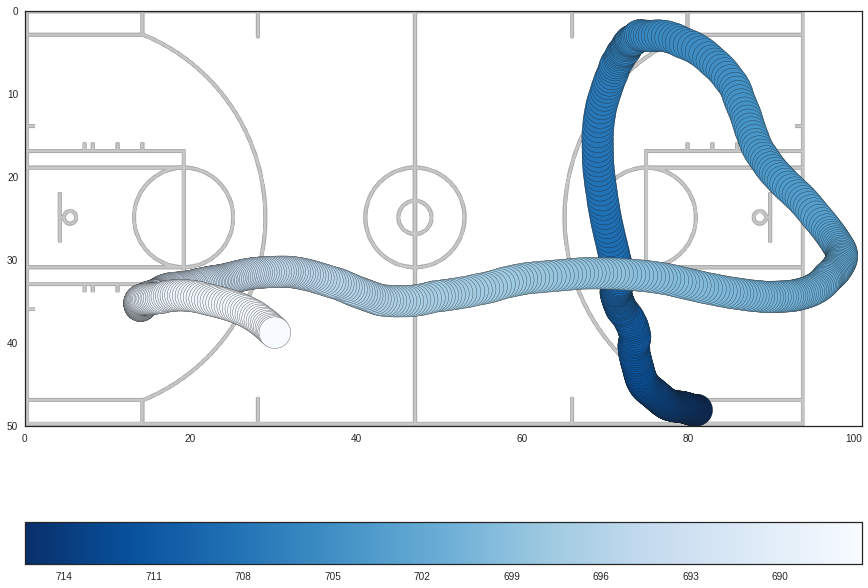

In [23]:
plt.figure(figsize=(15, 11.5))

# Plot the movemnts as scatter plot
# using a colormap to show change in game clock
plt.scatter(harden.x_loc, harden.y_loc, c=harden.game_clock,
            cmap=plt.cm.Blues, s=1000, zorder=1)
# Darker colors represent moments earlier on in the game
cbar = plt.colorbar(orientation="horizontal")
cbar.ax.invert_xaxis()

# This plots the court
# zorder=0 sets the court lines underneath Harden's movements
# extent sets the x and y axis values to plot the image within.
# The original animation plots in the SVG coordinate space
# which has x=0, and y=0 at the top left.
# So, we set the axis values the same way in this plot.
# In the list we pass to extent 0,94 representing the x-axis 
# values and 50,0 representing the y-axis values
plt.imshow(court, zorder=0, extent=[0,94,50,0])

# extend the x-values beyond the court b/c Harden
# goes out of bounds
plt.xlim(0,101)


plt.show()

We can also recreate most of the court by using just `matplotlib Patches`.  Instead of using the SVG coordinate system we will use the typical Cartesian coordinate system, so our y-values will be negative instead of positive.

In [24]:
from matplotlib.patches import Circle, Rectangle, Arc

# Function to draw the basketball court lines
def draw_court(ax=None, color="gray", lw=1, zorder=0):
    
    if ax is None:
        ax = plt.gca()

    # Creates the out of bounds lines around the court
    outer = Rectangle((0,-50), width=94, height=50, color=color,
                      zorder=zorder, fill=False, lw=lw)

    # The left and right basketball hoops
    l_hoop = Circle((5.35,-25), radius=.75, lw=lw, fill=False, 
                    color=color, zorder=zorder)
    r_hoop = Circle((88.65,-25), radius=.75, lw=lw, fill=False,
                    color=color, zorder=zorder)
    
    # Left and right backboards
    l_backboard = Rectangle((4,-28), 0, 6, lw=lw, color=color,
                            zorder=zorder)
    r_backboard = Rectangle((90, -28), 0, 6, lw=lw,color=color,
                            zorder=zorder)

    # Left and right paint areas
    l_outer_box = Rectangle((0, -33), 19, 16, lw=lw, fill=False,
                            color=color, zorder=zorder)    
    l_inner_box = Rectangle((0, -31), 19, 12, lw=lw, fill=False,
                            color=color, zorder=zorder)
    r_outer_box = Rectangle((75, -33), 19, 16, lw=lw, fill=False,
                            color=color, zorder=zorder)

    r_inner_box = Rectangle((75, -31), 19, 12, lw=lw, fill=False,
                            color=color, zorder=zorder)

    # Left and right free throw circles
    l_free_throw = Circle((19,-25), radius=6, lw=lw, fill=False,
                          color=color, zorder=zorder)
    r_free_throw = Circle((75, -25), radius=6, lw=lw, fill=False,
                          color=color, zorder=zorder)

    # Left and right corner 3-PT lines
    # a represents the top lines
    # b represents the bottom lines
    l_corner_a = Rectangle((0,-3), 14, 0, lw=lw, color=color,
                           zorder=zorder)
    l_corner_b = Rectangle((0,-47), 14, 0, lw=lw, color=color,
                           zorder=zorder)
    r_corner_a = Rectangle((80, -3), 14, 0, lw=lw, color=color,
                           zorder=zorder)
    r_corner_b = Rectangle((80, -47), 14, 0, lw=lw, color=color,
                           zorder=zorder)
    
    # Left and right 3-PT line arcs
    l_arc = Arc((5,-25), 47.5, 47.5, theta1=292, theta2=68, lw=lw,
                color=color, zorder=zorder)
    r_arc = Arc((89, -25), 47.5, 47.5, theta1=112, theta2=248, lw=lw,
                color=color, zorder=zorder)

    # half_court
    # ax.axvline(470)
    half_court = Rectangle((47,-50), 0, 50, lw=lw, color=color,
                           zorder=zorder)

    hc_big_circle = Circle((47, -25), radius=6, lw=lw, fill=False,
                           color=color, zorder=zorder)
    hc_sm_circle = Circle((47, -25), radius=2, lw=lw, fill=False,
                          color=color, zorder=zorder)

    court_elements = [l_hoop, l_backboard, l_outer_box, outer,
                      l_inner_box, l_free_throw, l_corner_a,
                      l_corner_b, l_arc, r_hoop, r_backboard, 
                      r_outer_box, r_inner_box, r_free_throw,
                      r_corner_a, r_corner_b, r_arc, half_court,
                      hc_big_circle, hc_sm_circle]

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

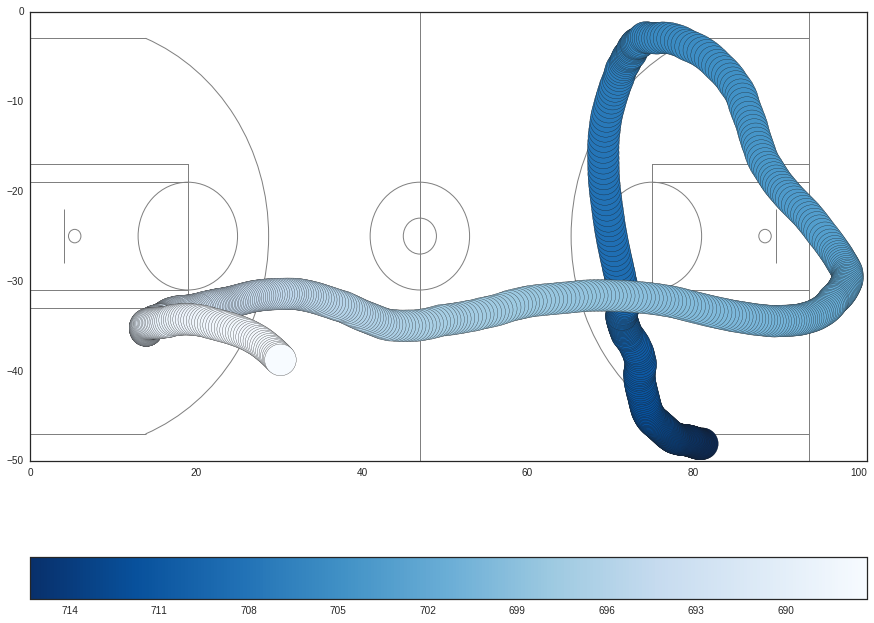

In [25]:
plt.figure(figsize=(15, 11.5))

# Plot the movemnts as scatter plot
# using a colormap to show change in game clock
plt.scatter(harden.x_loc, -harden.y_loc, c=harden.game_clock,
            cmap=plt.cm.Blues, s=1000, zorder=1)
# Darker colors represent moments earlier on in the game
cbar = plt.colorbar(orientation="horizontal")
# invert the colorbar to have higher numbers on the left
cbar.ax.invert_xaxis()

draw_court()

plt.xlim(0, 101)
plt.ylim(-50, 0)
plt.show()

###Calculating distance traveled

We can calculate the distance traveled by a player by getting the [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance) between consecutive points and then adding those distances. 

[SO link](https://stackoverflow.com/questions/13590484/calculating-euclidean-distance-between-consecutive-points-of-an-array-with-numpy) about getting euclidean distance for consecutive points.

In [26]:
def travel_dist(player_locations):
    # get the differences for each column
    diff = np.diff(player_locations, axis=0)
    # square the differences and add them,
    # then get the square root of that sum
    dist = np.sqrt((diff ** 2).sum(axis=1))
    # Then return the sum of all the distances
    return dist.sum()

In [27]:
# Harden's travel distance
dist = travel_dist(harden[["x_loc", "y_loc"]])
dist

197.44816608512659

We can get the total distance traveled by each player using `groupby` and `apply`.  We group by player, get each of their coordinate locations, and then apply the above *distance* function.

In [28]:
player_travel_dist = df.groupby('player_name')[['x_loc', 'y_loc']].apply(travel_dist)
player_travel_dist

player_name
Blake Griffin     153.076637
Chris Paul        176.198330
DeAndre Jordan    119.919877
Dwight Howard     123.439590
JJ Redick         184.504145
James Harden      197.448166
Jason Terry       173.308880
Josh Smith        162.226100
Matt Barnes       161.976406
Trevor Ariza      153.389365
ball              328.317612
dtype: float64

###Calculating average speed

Calulcating a players average speed is pretty straight forward.  All we do is just divide the distance by time.

In [29]:
# get the number of seconds for the play
seconds = df.game_clock.max() - df.game_clock.min()
# feet per second
harden_fps = dist / seconds
# convert to miles per hour
harden_mph = 0.681818 * harden_fps
harden_mph

4.7977089702005902

We can get the average speed for each player using the *player_travel_dist* `Series` we previously created.

In [30]:
player_speeds = (player_travel_dist/seconds) * 0.681818
player_speeds

player_name
Blake Griffin     3.719544
Chris Paul        4.281368
DeAndre Jordan    2.913882
Dwight Howard     2.999406
JJ Redick         4.483188
James Harden      4.797709
Jason Terry       4.211159
Josh Smith        3.941863
Matt Barnes       3.935796
Trevor Ariza      3.727143
ball              7.977650
dtype: float64

###Calculate the distance between players
Lets check out the distance between Harden and every other player throughout the play.

First get Harden's locations.

In [31]:
harden_loc = df[df.player_name=="James Harden"][["x_loc", "y_loc"]]

In [32]:
harden_loc.head()

x_loc     y_loc
5   81.09920  48.10742
16  81.01996  48.11580
27  80.93976  48.12279
38  80.85964  48.12597
49  80.77435  48.12823

Now lets group by *player_name* and get the locations for each player and the ball.

In [33]:
group = df[df.player_name!="James Harden"].groupby("player_name")[["x_loc", "y_loc"]]

We can apply a function, utilizing the `euclidean` function from the `scipy` library, on *group*.  returning us a list for each player that contains the distance between James Harden and the player throughout the play.

In [34]:
from scipy.spatial.distance import euclidean

In [35]:
# Function to find the distance between players
# at each moment
def player_dist(player_a, player_b):
    return [euclidean(player_a.iloc[i], player_b.iloc[i])
            for i in range(len(player_a))]

Each player's locations are passed in as *player_a* in the *player_dist* function and Harden's locations are passed in as *player_b*.

In [36]:
harden_dist = group.apply(player_dist, player_b=(harden_loc))

In [37]:
harden_dist

player_name
Blake Griffin     [27.182922508363593, 27.055820685362697, 26.94...
Chris Paul        [47.10168680005101, 46.861684798626264, 46.618...
DeAndre Jordan    [16.413678482610162, 16.48314022711995, 16.556...
Dwight Howard     [14.282883583198455, 14.35720390798292, 14.433...
JJ Redick         [5.697440979685529, 5.683098128626677, 5.67370...
Jason Terry       [51.685939334067434, 51.40228120171322, 51.096...
Josh Smith        [44.06513224475787, 43.81023267813696, 43.5637...
Matt Barnes       [37.5405670597302, 37.59395273374297, 37.68516...
Trevor Ariza      [41.47340873263252, 41.414794206955804, 41.348...
ball              [52.976156009708745, 52.70430545836839, 52.435...
dtype: object

Just note that the ball only has 690 items in its list, versus 700 for the players.

In [38]:
len(harden_dist["ball"])

690

In [39]:
len(harden_dist["Blake Griffin"])

700

Now that we know how to get the distances between players lets try to see how James Harden's drive to the basket affects some of the spacing on the floor.

Let's take another look at the moments animation. And go over what occurs during Harden's drive.

In [40]:
IFrame('http://stats.nba.com/movement/#!/?GameID=0041400235&GameEventID=308',
              width=700, height=400)

As Harden drives to the hoop, DeAndre Jordan moves off of Dwight Howards to defend basket and Matt Barnes switches over to cover Howards (but falls down), leaving Ariza open.  Harden sees Ariza, passes him the ball, and Ariza takes the shot as Chris Paul tries to rush over to defend.  All this occurs from about 11:46 left in the 3rd quarter to about 11:42, and the shot clock runs from about 10.1 seconds when Harden begins his drive to about 6.2 when Ariza releases the ball. We can actually find more information about Ariza's shot attempt in his shot logs [page](http://stats.nba.com/player/#!/2772/tracking/shotslogs/?Season=2014-15&SeasonType=Playoffs&OpponentTeamID=1610612746&Period=3). 

In [41]:
# Boolean mask used to grab the data within the proper time period
time_mask = (df.game_clock <= 706) & (df.game_clock >= 702) & \
            (df.shot_clock <= 10.1) & (df.shot_clock >= 6.2)
time_df = df[time_mask]

From the animation it looks like Harden passes the ball around 7.7 to 7.8 seconds left in the quarter. We can check out the distance between him and the ball to be sure.

In [42]:
ball = time_df[time_df.player_name=="ball"]
harden2 = time_df[time_df.player_name=="James Harden"]
harden_ball_dist = player_dist(ball[["x_loc", "y_loc"]],
                               harden2[["x_loc", "y_loc"]])

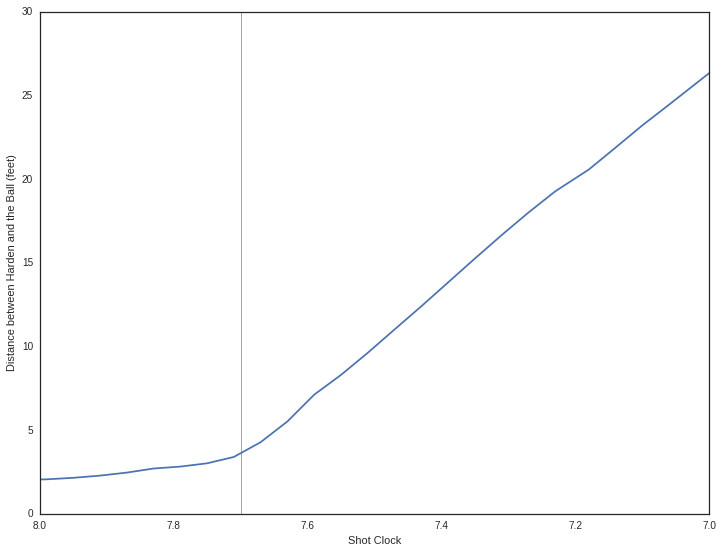

In [43]:
plt.figure(figsize=(12,9))

x = time_df.shot_clock.unique()
y =  harden_ball_dist
plt.plot(x, y)
plt.xlim(8, 7)

plt.xlabel("Shot Clock")
plt.ylabel("Distance between Harden and the Ball (feet)")
plt.vlines(7.7, 0, 30, color='gray', lw=0.7)

plt.show()

Lets plot the change in distances between some of the players during this time period.  We'll plot the change between Harden and Jordan, Howard and Barnes, Ariza and Barnes, and Ariza and Paul.

In [44]:
# Boolean mask to get the players we want
player_mask = (time_df.player_name=="Trevor Ariza") | \
              (time_df.player_name=="DeAndre Jordan") | \
              (time_df.player_name=="Dwight Howard") | \
              (time_df.player_name=="Matt Barnes") | \
              (time_df.player_name=="Chris Paul") | \
              (time_df.player_name=="James Harden")

In [45]:
# Group by players and get their locations
group2 = time_df[player_mask].groupby('player_name')[["x_loc", "y_loc"]]

In [46]:
# Get the differences in distances that we want
harden_jordan = player_dist(group2.get_group("James Harden"),
                            group2.get_group("DeAndre Jordan"))
howard_barnes = player_dist(group2.get_group("Dwight Howard"),
                            group2.get_group("Matt Barnes"))
ariza_barnes = player_dist(group2.get_group("Trevor Ariza"),
                            group2.get_group("Matt Barnes"))
ariza_paul = player_dist(group2.get_group("Trevor Ariza"),
                            group2.get_group("Chris Paul"))

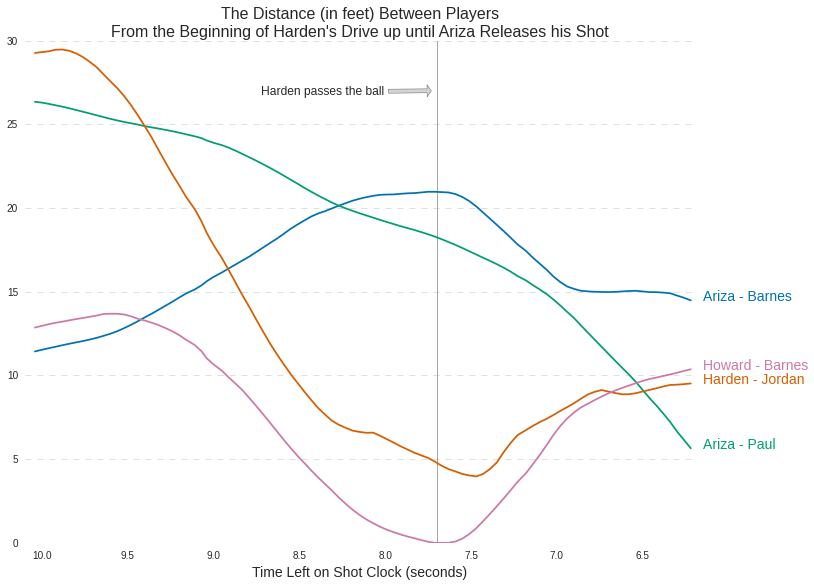

In [47]:
# Create some lists that will help create our plot
# Distance data
distances = [ariza_barnes, ariza_paul, harden_jordan, howard_barnes]
# Labels for each line that we will plopt
labels = ["Ariza - Barnes", "Ariza - Paul", "Harden - Jordan", "Howard - Barnes"]
# Colors for each line
colors = sns.color_palette('colorblind', 4)

plt.figure(figsize=(12,9))

# Use enumerate to index the labels and colors and match
# them with the proper distance data
for i, dist in enumerate(distances):
    plt.plot(time_df.shot_clock.unique(), dist, color=colors[i])
    
    y_pos = dist[-1]
    
    plt.text(6.15, y_pos, labels[i], fontsize=14, color=colors[i])

# Plot a line to indicate when Harden passes the ball
plt.vlines(7.7, 0, 30, color='gray', lw=0.7)
plt.annotate("Harden passes the ball", (7.7, 27), 
             xytext=(8.725, 26.8), fontsize=12, 
             arrowprops=dict(facecolor='lightgray', shrink=0.10))

# Create horizontal grid lines
plt.grid(axis='y',color='gray', linestyle='--', lw=0.5, alpha=0.5)

plt.xlim(10.1, 6.2)

plt.title("The Distance (in feet) Between Players \nFrom the Beginning"
          " of Harden's Drive up until Ariza Releases his Shot", size=16)
plt.xlabel("Time Left on Shot Clock (seconds)", size=14)

# Get rid of unneeded chart lines
sns.despine(left=True, bottom=True) 

plt.show()

I created a small Python module, that you can find [here](https://github.com/savvastj/nbaPlayerTracking), containing some of the functions used in this post.


###Comments, Suggestion, Questions, and Contact Info
Leave a comment below if you have any questions, see any issues, or have any suggestions on improving the code.

You can also email me at savvas.tjortjoglou@gmail.com or follow me on Twitter [@savvas_tj](https://twitter.com/savvas_tj).